# To retrieve dataset from Kaggle using API

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ushasupriya","key":"dba5f8331dcfa36ba0d7db2eaf8bffbd"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                       title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/piterfm/2022-ukraine-russian-war                                 2022 Ukraine Russia War                              1KB  2022-03-29 09:48:26           3374        220  1.0              
datasets/prasertk/healthy-lifestyle-cities-report-2021                    Healthy Lifestyle Cities Report 2021                 2KB  2022-03-03 00:26:02           3336        100  1.0              
datasets/kamilpytlak/personal-key-indicators-of-heart-disease             Personal Key Indicators of Heart Disease             3MB  2022-02-16 10:18:03           5799        122  1.0              
datasets/vivek4

In [ ]:
#Cannot download as the competition is private,so downloading the dataset manually from other place
! kaggle competitions download -c breast-cancer-classification

403 - Forbidden


# Uploading the file from local

In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
files.upload()

Saving data.csv to data.csv


{'data.csv': b'"id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst",\r\n842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189\r\n842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902\r\n84300903,M,1

**Pre-Processing** : Retieving data and cleaning

In [ ]:
data=pd.read_csv("data.csv")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Since only last column consists NA values, it's better to drop it down

In [ ]:
data.drop(['Unnamed: 32'], axis = 1, inplace = True)

In [ ]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


Replace categorical values of diagnosis column with numericals 

In [ ]:
data['diagnosis'].replace({'M':1 , 'B':0}, inplace=True)

In [ ]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


# **Exploratory Data Analysis**: **Data Visualization**

Now that our data is clean, let's do some data visualization to identify important features

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

## CounterPlots




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


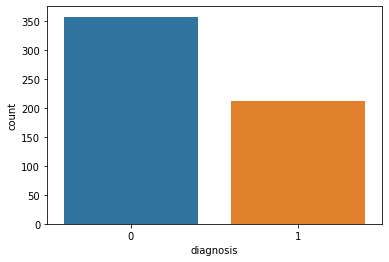

In [ ]:
sns.countplot(data['diagnosis'],label='count')
plt.show()

Referred Kaggle site https://www.kaggle.com/code/s1700270/8-1-feature-selection-and-extraction for understanding feature selection and extraction for this project

In [ ]:
y = data.pop('diagnosis')
X = data.copy()

In [ ]:
print(X.shape)
print(y.shape)

(569, 31)
(569,)


In [ ]:
# Splitting the data into train(70%), test(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [ ]:
X_train.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,3.012241e+07,14.176078,19.159171,92.256332,659.770854,0.095962,0.103303,0.088071,0.048440,0.180308,...,16.287322,25.505553,107.363844,881.848241,0.131772,0.249086,0.268497,0.113839,0.288300,0.083537
std,1.270358e+08,3.535730,4.214074,24.289529,358.865452,0.013766,0.051209,0.077836,0.037712,0.026871,...,4.799691,6.017564,33.083204,570.753903,0.023023,0.148622,0.196139,0.063886,0.062318,0.017518
min,8.915000e+03,7.691000,9.710000,48.340000,170.400000,0.062510,0.019380,0.000000,0.000000,0.116700,...,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,8.682072e+05,11.752500,16.170000,75.805000,426.175000,0.085550,0.063407,0.029585,0.020692,0.161575,...,13.075000,21.070000,84.542500,521.550000,0.114325,0.147325,0.116475,0.063885,0.247775,0.071155
50%,9.053455e+05,13.275000,18.700000,85.980000,546.250000,0.094625,0.091280,0.061880,0.034110,0.178800,...,14.975000,25.155000,97.745000,687.600000,0.131150,0.209250,0.226200,0.099270,0.280750,0.080165
75%,8.813066e+06,16.090000,21.555000,105.625000,797.400000,0.104475,0.130575,0.127075,0.073963,0.195550,...,18.707500,29.410000,125.300000,1061.250000,0.146000,0.341600,0.384700,0.160400,0.315650,0.091745
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,0.903400,0.275600,0.663800,0.173000


If we notice the values in table, the difference between maximum values of some columns are way too high. Therefore, we need to scale our data at some stage if we want it to work across different classifiers, especially distance-based ones like SVM, NN, k-NN etc.

In [ ]:
X_train_scaled = (X_train - X_train.mean()) / (X_train.std())                      # standardization
X_test_scaled = (X_test - X_test.mean()) / (X_test.std()) 

## **Violin plots**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

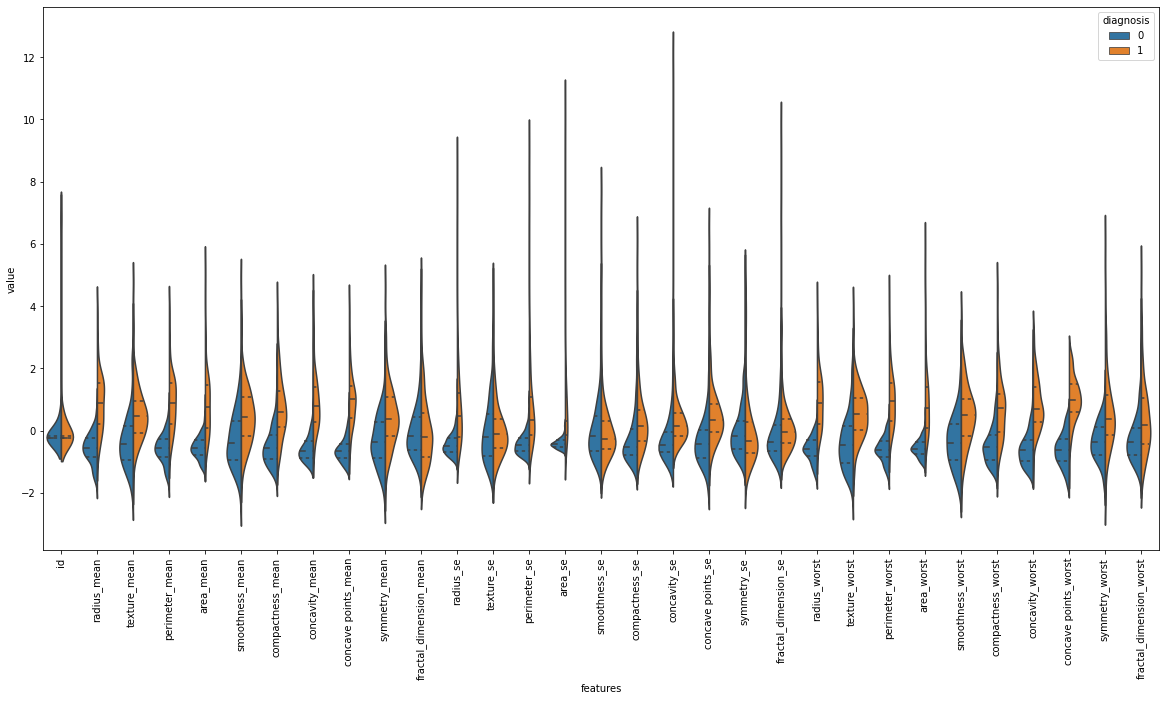

In [ ]:
df_train_scaled = pd.concat([y_train, X_train_scaled],axis=1)

#Violin plots
melted_df = pd.melt(df_train_scaled,id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(20,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=melted_df,split=True, inner="quart")
plt.xticks(rotation=90)

Observation: 
It is seen that in features like fractional_dimensiom,symmetry,smoothness-the medians of malignant and benign are not separated well, hence cannot classify. But in features like texture,radius, medians are separated-hence can be used for classification

## **BoxPlot**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

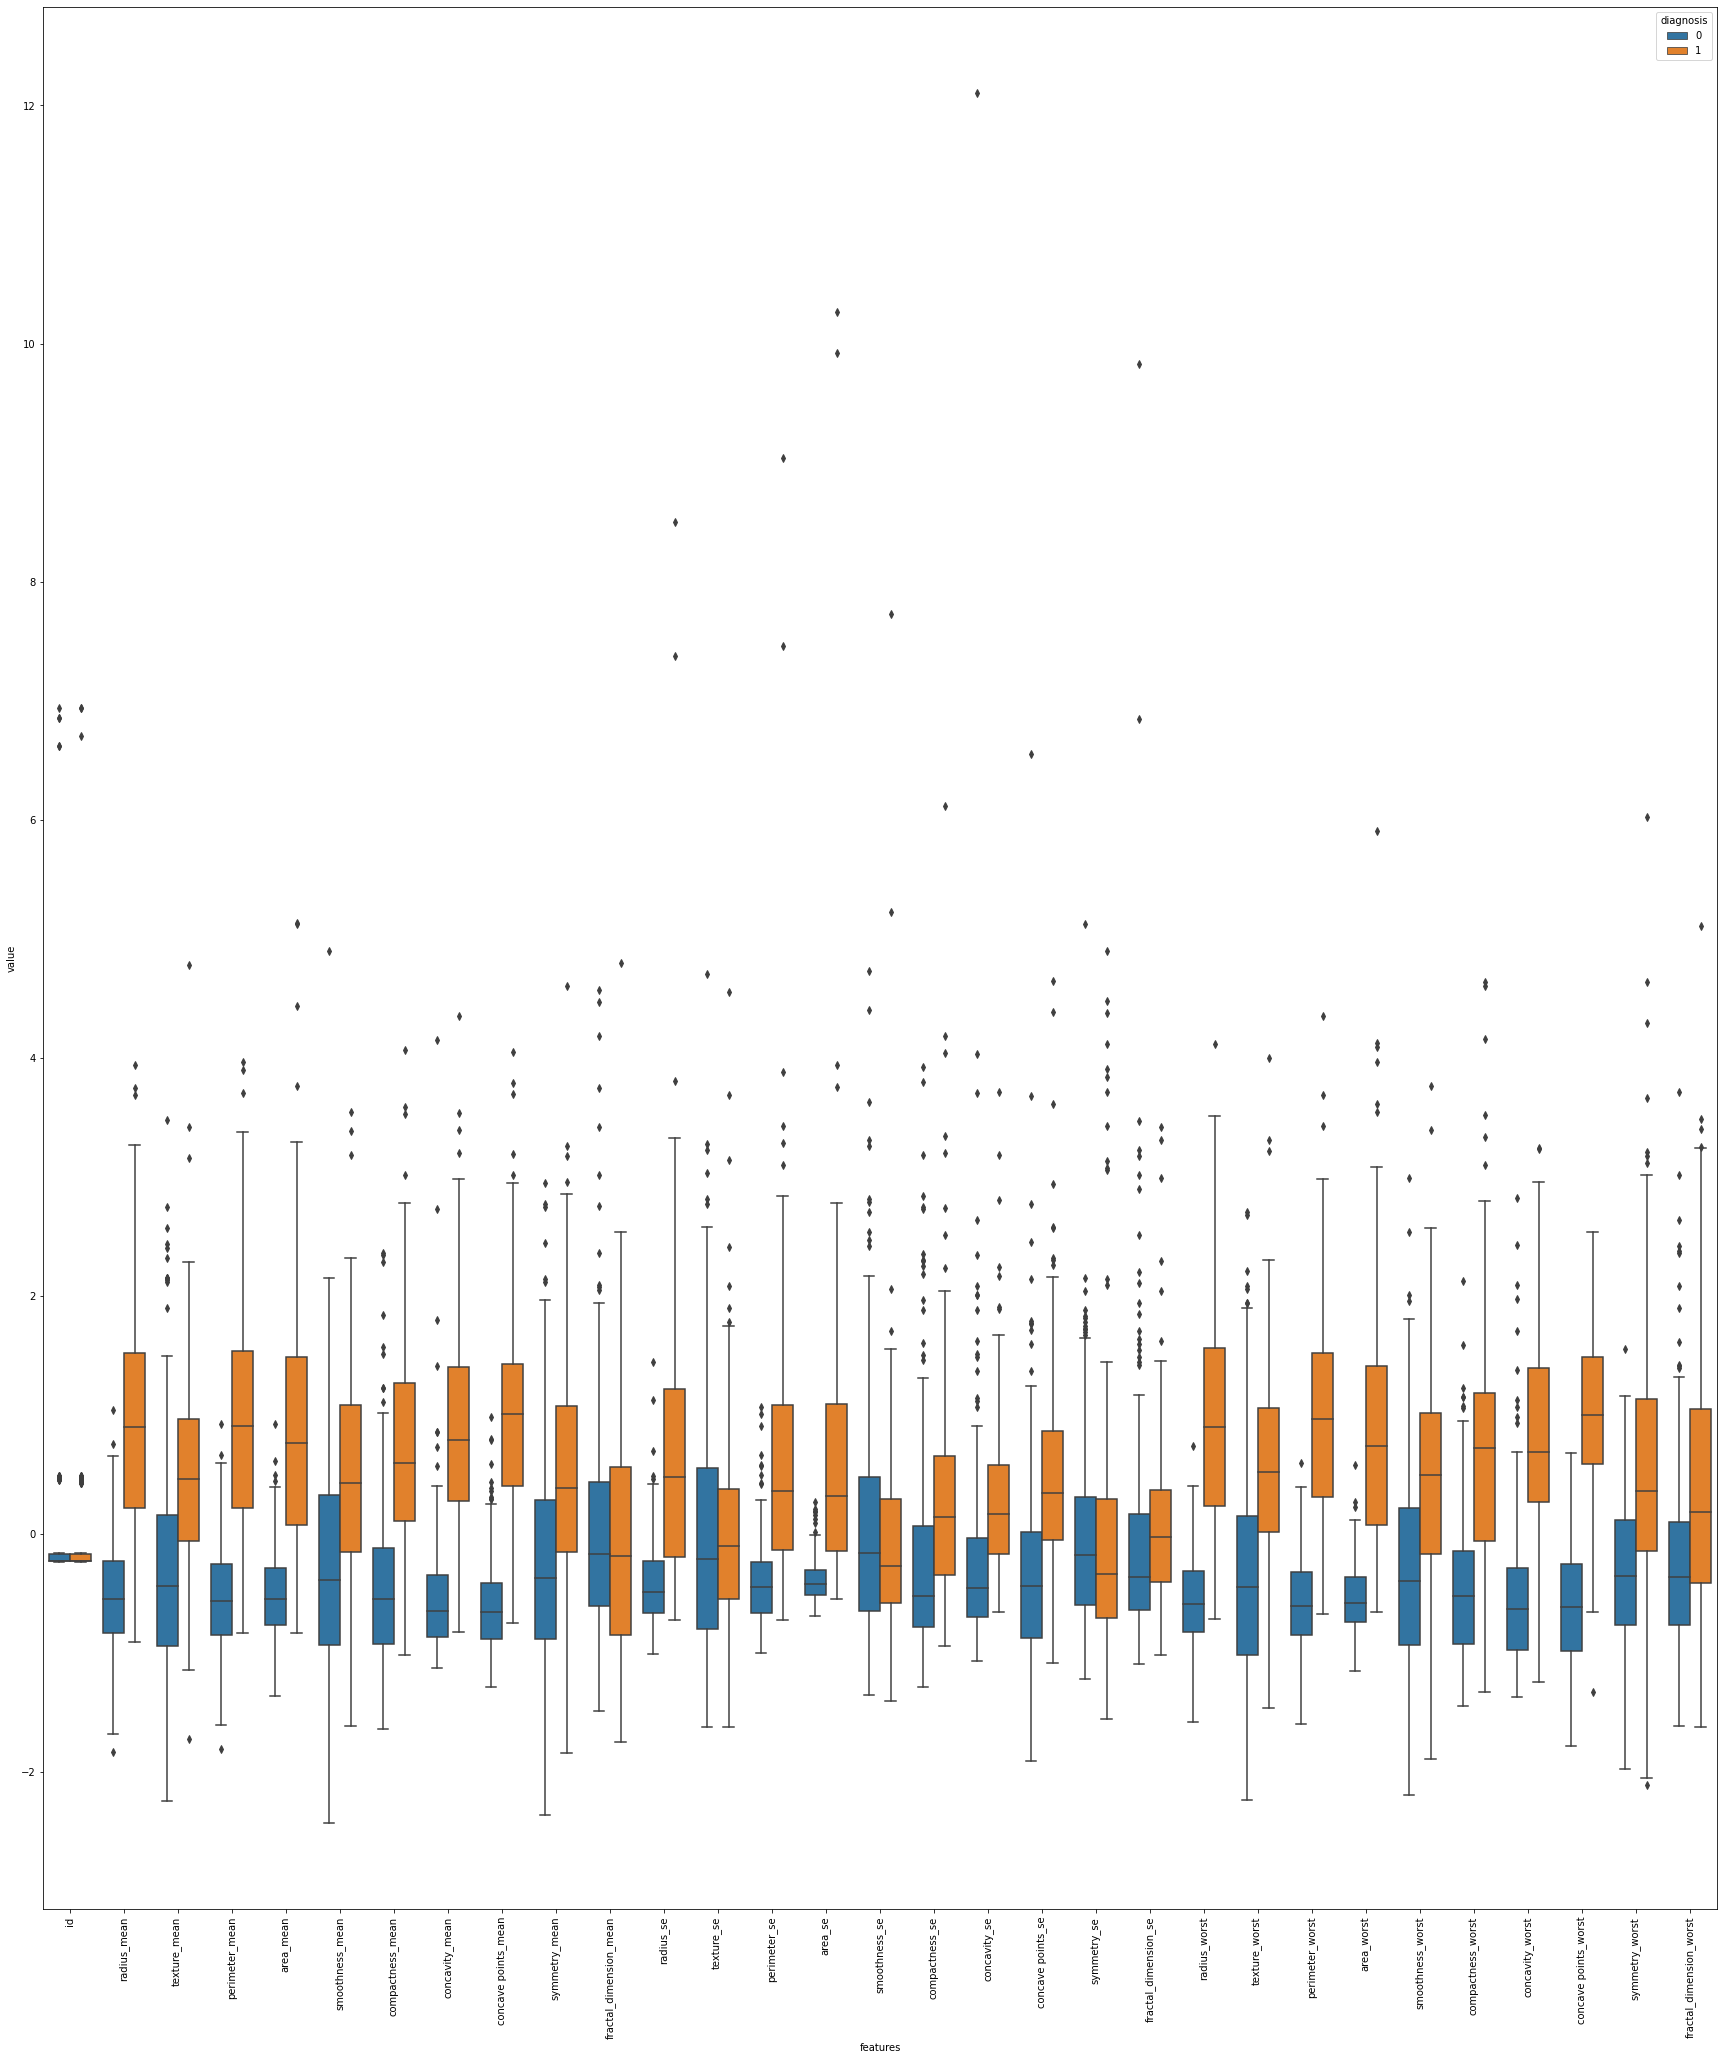

In [ ]:
plt.figure(figsize=(30,35))
sns.boxplot(x="features", y="value", hue="diagnosis", data=melted_df)
plt.xticks(rotation=90)

Observation:
Again we observe that fractional dimension features are not good for classifying the data

## **Swarm Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 29.6% of the points cannot be placed; y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

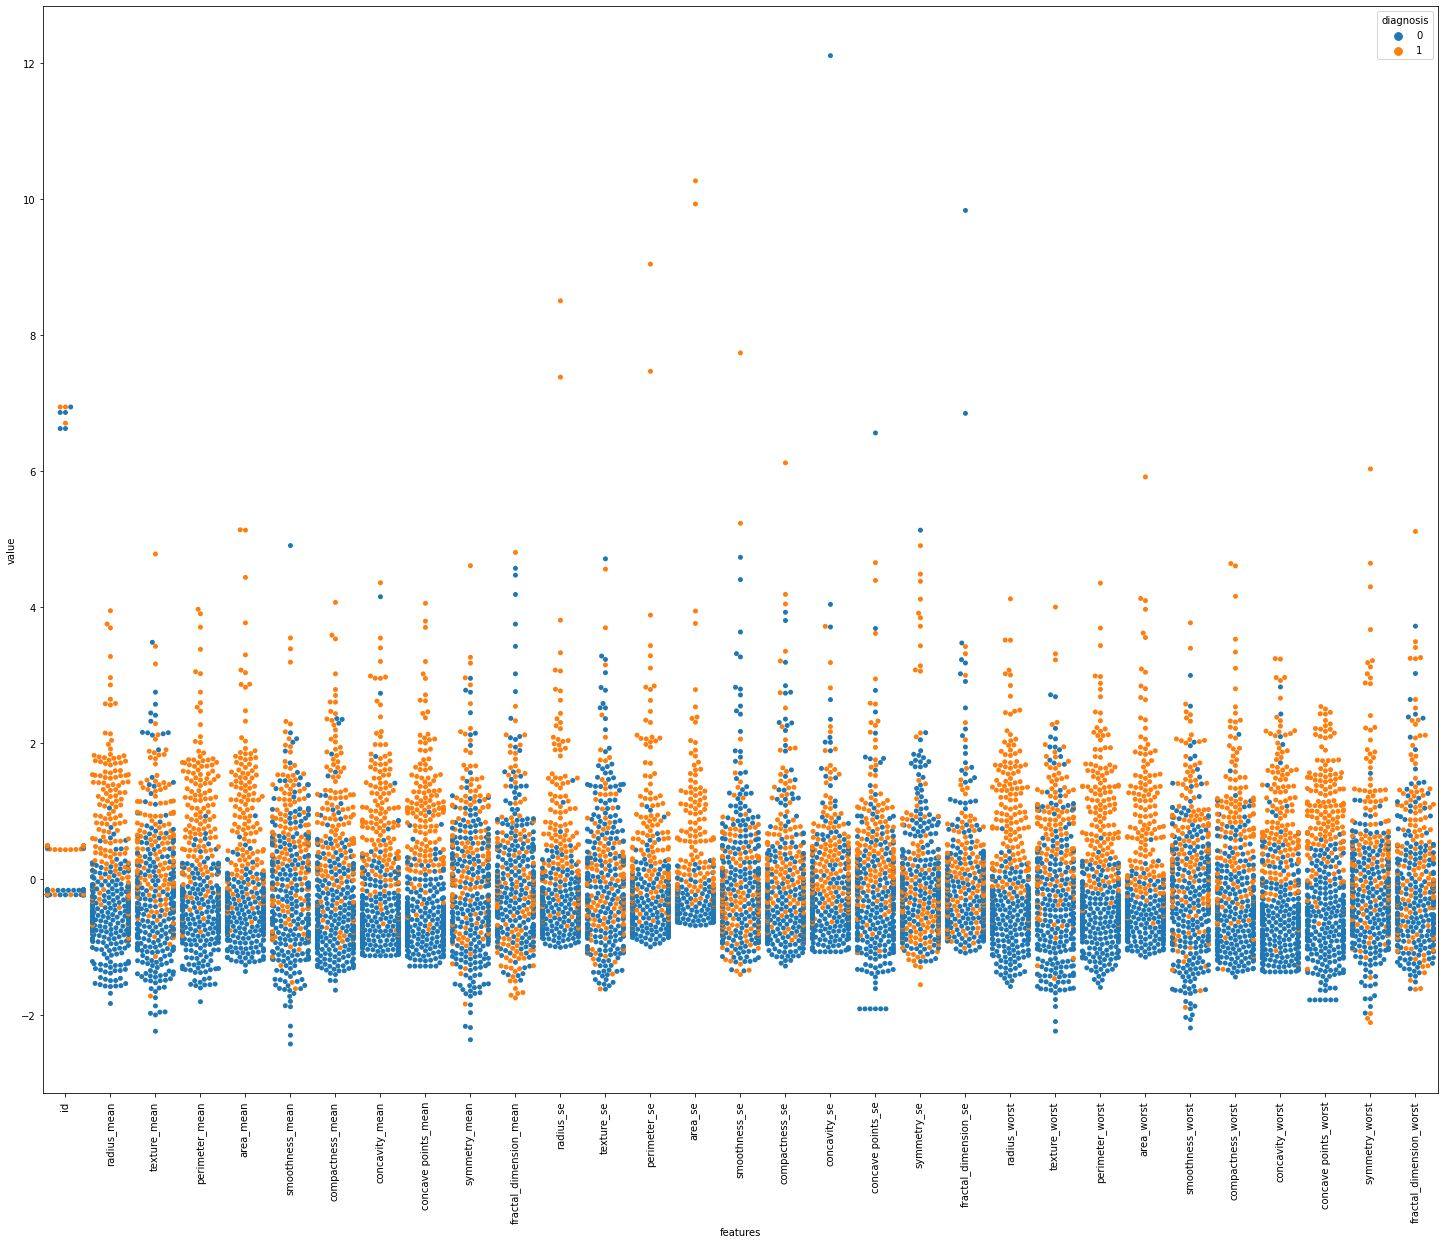

In [ ]:
plt.figure(figsize=(25,20))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=melted_df)
plt.xticks(rotation=90)

Observation:
Some of the features like radius_mean, perimeter_mean, concave_points_mean and so on are clearly separable and can be considered as important features for our classification

**Correlation:**


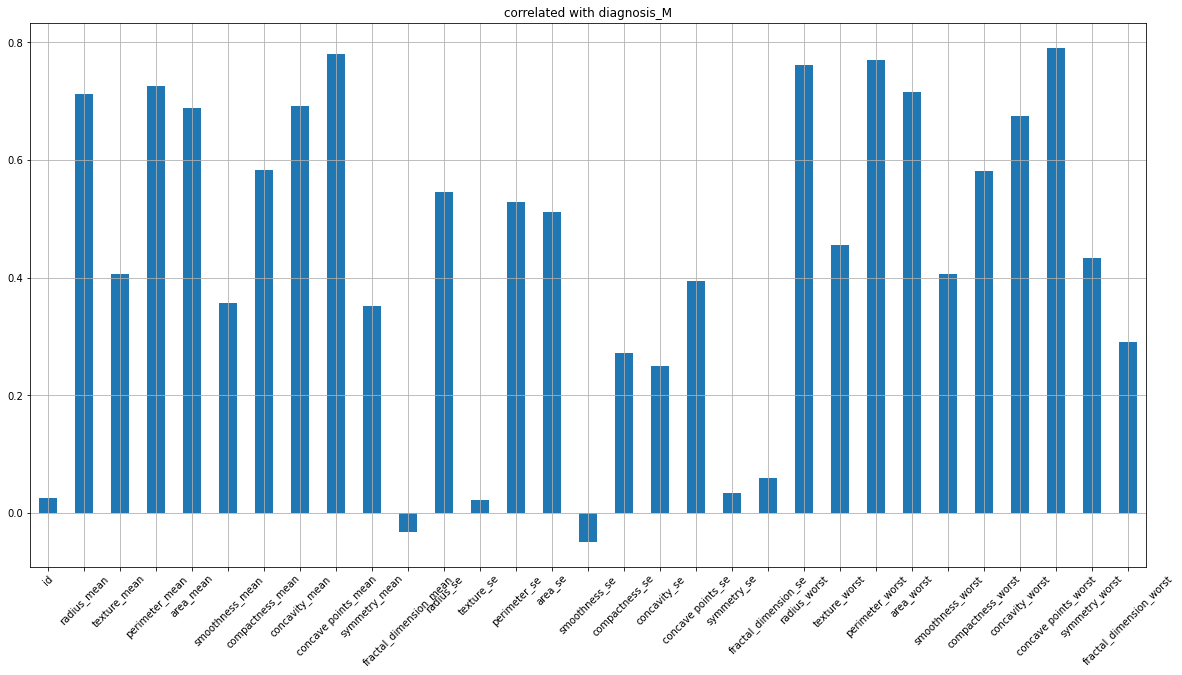

In [ ]:
X_train.corrwith(y_train).plot.bar(
    figsize=(20,10),title='correlated with diagnosis_M',rot=45,grid=True
)

Observation:
Clearly corrwith parameter says that fractional_dimension_mean, texture_se,smoothness_se,symmetry_se are not of much use for predicting cancer tumor

# **Feature Selection**

Now let's extract the important features for our model to perform classification

## 1. **Collinearity using heatmap:**

In [ ]:
corr= X_train.corr()

In [ ]:
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.042109,0.128961,0.044116,0.073046,0.023626,0.005430,0.056109,0.026820,0.019371,...,0.061642,0.068297,0.061861,0.096988,0.026666,-0.012135,0.017883,0.000227,-0.028463,0.003682
radius_mean,0.042109,1.000000,0.304231,0.997852,0.986512,0.136103,0.457127,0.654620,0.811418,0.162263,...,0.967929,0.281395,0.963948,0.941101,0.084000,0.360294,0.513258,0.716764,0.173470,-0.055387
texture_mean,0.128961,0.304231,1.000000,0.311321,0.297186,0.009986,0.240497,0.297140,0.296437,0.110906,...,0.336194,0.905251,0.347047,0.323267,0.085070,0.277202,0.289704,0.307926,0.109941,0.080590
perimeter_mean,0.044116,0.997852,0.311321,1.000000,0.986063,0.173230,0.509227,0.695139,0.840800,0.196485,...,0.967844,0.288195,0.969469,0.941998,0.115155,0.404053,0.552025,0.745526,0.194465,-0.011397
area_mean,0.073046,0.986512,0.297186,0.986063,1.000000,0.149533,0.452539,0.666760,0.813122,0.162577,...,0.958754,0.267217,0.955825,0.958972,0.094222,0.339188,0.499420,0.694462,0.146670,-0.053357
smoothness_mean,0.023626,0.136103,0.009986,0.173230,0.149533,1.000000,0.667714,0.518482,0.543794,0.536178,...,0.185979,0.063056,0.212390,0.185758,0.801666,0.479688,0.449858,0.503223,0.364835,0.523257
compactness_mean,0.005430,0.457127,0.240497,0.509227,0.452539,0.667714,1.000000,0.870975,0.812297,0.621835,...,0.489156,0.248877,0.548307,0.467568,0.566302,0.860437,0.825427,0.805967,0.482526,0.681995
concavity_mean,0.056109,0.654620,0.297140,0.695139,0.666760,0.518482,0.870975,1.000000,0.919016,0.519625,...,0.665471,0.293236,0.709193,0.658096,0.437524,0.729719,0.885436,0.849624,0.385528,0.491768
concave points_mean,0.026820,0.811418,0.296437,0.840800,0.813122,0.543794,0.812297,0.919016,1.000000,0.481845,...,0.821852,0.298627,0.849187,0.803754,0.445638,0.641887,0.763281,0.907002,0.378018,0.337097
symmetry_mean,0.019371,0.162263,0.110906,0.196485,0.162577,0.536178,0.621835,0.519625,0.481845,1.000000,...,0.198148,0.133300,0.232767,0.186166,0.413800,0.500870,0.469112,0.472662,0.679084,0.460556


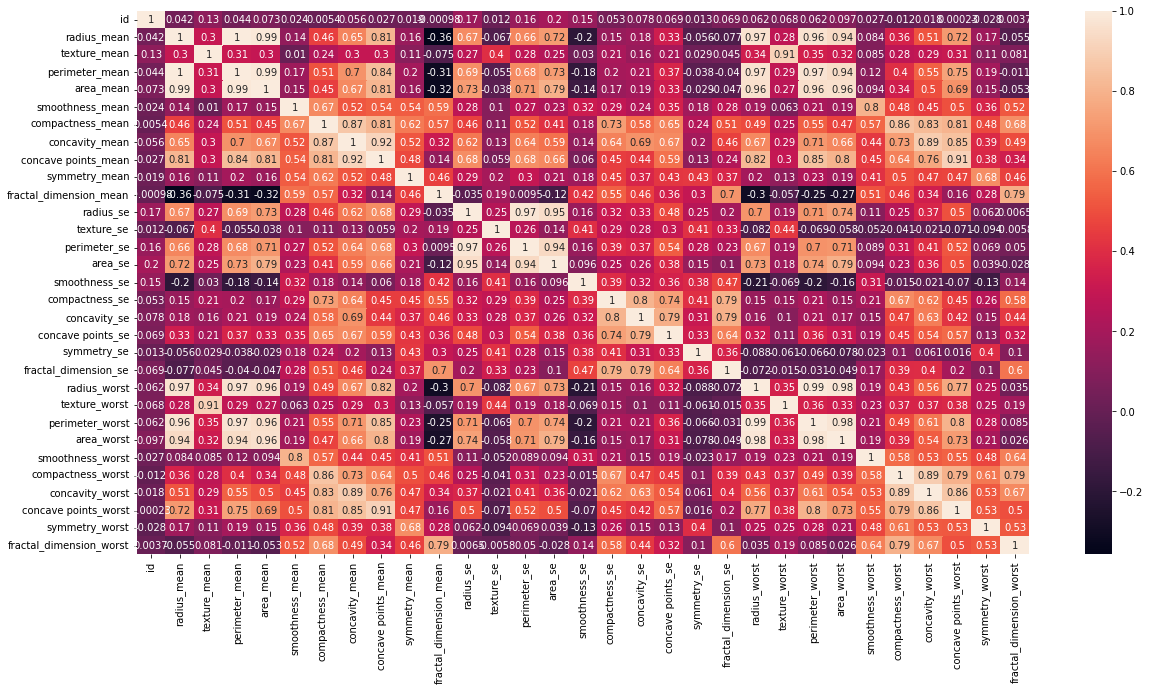

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

Observations:
1. As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean. If you ask how i choose area_mean as a feature to use, well actually there is no correct answer, I just look at swarm plots and area_mean looks like clear for me but we cannot make exact separation among other correlated features without trying. 
2. Compactness_mean, concavity_mean and concave points_mean are correlated with each other. Only choose concavity_mean.
3. Apart from these, radius_se, perimeter_se and area_se etc. are correlated due to obvious reasons. Only use area_se.
4. area_worst and area_mean are also correlated; use area_mean.
radius_worst, perimeter_worst and area_worst are correlated; use area_worst.
5. Compactness_worst, concavity_worst and concave points_worst; use concavity_worst.
6. Compactness_se, concavity_se and concave points_se; use concavity_se.
texture_mean and texture_worst are correlated; use texture_mean.

## 2. **Recursive feature elimination with cross-validation**

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html Now we will not only find best features but we also find how many features do we need for best accuracy.

In [ ]:
#Taken from a Kaggle site
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier(random_state=42) 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=2,scoring='accuracy')   #10-fold cross-validation
rfecv = rfecv.fit(X_train_scaled, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train_scaled.columns[rfecv.support_])

Optimal number of features : 28
Best features : Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'perimeter_se', 'area_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')


1. From the EDA that we have done above using box,violin,Swarm plots and after checking collinearity,it is clear that the above features can be considered important once for our model i.e., most of them are important for cancer prediction
2. It is eliminating: texture_se,smoothness_se and fractional_dimension_worst

Now let's Use only Valid features that we selected in Feature Selection process using CV

In [ ]:
x_train=X_train_scaled.drop(labels=['texture_se','smoothness_se','fractal_dimension_worst'],axis=1)
x_test=X_test_scaled.drop(labels=['texture_se','smoothness_se','fractal_dimension_worst'],axis=1)

# **Models**

Let us use all the Classification models on the given data and predict accuracy

In [ ]:
def model_building(model):
    """
    Model Fitting, Prediction And 
    return ('score', 'accuracy_score', 'predictions' )
    """
    
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(predictions, y_test)
    
    return (accuracy, predictions)    

In [ ]:
models_list = {
    "LogisticRegression" :  LogisticRegression(random_state = 0),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    "SVCUsingLinearKernel" : SVC(kernel = 'linear', random_state = 0),
    "SVCUsingRbfKernel" : SVC(kernel = 'rbf', random_state = 0),
    "NaiveBayesClassifier" : GaussianNB(),
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),

}

In [ ]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    (accuracy, predictions) = model_building(model)
    print("\n\nClassification Report of '"+ str(name), "'\n")
    print(classification_report(y_test, predictions))
    df_prediction.append([name, accuracy, "{0:.2%}".format(accuracy)])
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))   
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)




Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       108
           1       1.00      0.95      0.98        63

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Classification Report of 'KNeighborsClassifier '

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Classification Report of 'SVCUsingLinearKernel '

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                

In [ ]:
df_pred

,model_name,accuracy_score,accuracy_percentage
0,LogisticRegression,0.982456,98.25%
1,KNeighborsClassifier,0.964912,96.49%
2,SVCUsingLinearKernel,0.976608,97.66%
3,SVCUsingRbfKernel,0.982456,98.25%
4,NaiveBayesClassifier,0.947368,94.74%
5,RandomForestClassifier,0.970760,97.08%
6,DecisionTreeClassifier,0.953216,95.32%


Let's represent the data beautifully using Pretty Table

In [ ]:
#prettytable is created after referring the following site https://pypi.org/project/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["S No", "Model", "Accuracy"]

for i in range(7):
  x.add_row([i+1, df_pred['model_name'][i],df_pred['accuracy_percentage'][i]])
print(x)

+------+------------------------+----------+
| S No |         Model          | Accuracy |
+------+------------------------+----------+
|  1   |   LogisticRegression   |  98.25%  |
|  2   |  KNeighborsClassifier  |  96.49%  |
|  3   |  SVCUsingLinearKernel  |  97.66%  |
|  4   |   SVCUsingRbfKernel    |  98.25%  |
|  5   |  NaiveBayesClassifier  |  94.74%  |
|  6   | RandomForestClassifier |  97.08%  |
|  7   | DecisionTreeClassifier |  95.32%  |
+------+------------------------+----------+


# **Conclusion**
Based on the Accuracy values in the above table, we can choose either **logistic regression** or **SVM using linear kernel** model for classifying breast cancer type. But according to Precision and recall values-it's preferable to choose Logistic Regression over SVC for our dataset